<a href="https://colab.research.google.com/github/aaapetrova/Tropicall_NN/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/heart_2020_cleaned.csv"

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# For ML models
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# Загрузка Датасета

In [ ]:
!ls /content/drive/MyDrive/heart_2020_cleaned.csv

/content/drive/MyDrive/heart_2020_cleaned.csv


## Column Descriptions

- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- BMI: Body Mass Index (BMI).
- Smoking: Have you smoked at least 100 cigarettes in your entire life?
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke(инсульт): (Ever told) (you had) a stroke?
- PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: Are you male or female?
- AgeCategory: Fourteen-level age category. (then calculated the mean)
- Race: Imputed race/ethnicity value.
- Diabetic: (Ever told) (you had) diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- GenHealth: Would you say that in general your health is...
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: (Ever told) (you had) asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
SkinCancer: (Ever told) (you had) skin cancer?

## Визуализация

In [ ]:
df = pd.read_csv(DATASET_PATH)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## INFO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])

Определение **категориальных** данных и **непрерывных**:

In [ ]:
CategoricalFeatures = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]
ContinuesFeatues = ["BMI", "PhysicalHealth", "MentalHealth", "AgeCategory", "SleepTime"]

In [ ]:
df.describe()[1:][ContinuesFeatues].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,54.355759,17.720429,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [ ]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index),
                     values=[x for x in df['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Smoking'].value_counts().index),
                     values=[x for x in df['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['AlcoholDrinking'].value_counts().index),
                     values=[x for x in df['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index),
                     values=[x for x in df['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalking'].value_counts().index),
                     values=[x for x in df['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index),
                     values=[x for x in df['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index),
                     values=[x for x in df['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df['PhysicalActivity'].value_counts().index),
                     values=[x for x in df['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Diabetic'].value_counts().index),
                     values=[x for x in df['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index),
                     values=[x for x in df['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Asthma'].value_counts().index),
                     values=[x for x in df['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df['KidneyDisease'].value_counts().index),
                     values=[x for x in df['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df['SkinCancer'].value_counts().index),
                     values=[x for x in df['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

## Preprocessing datasets


In [ ]:
print('Continuous Columns')
df.select_dtypes(include=['float']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


,min,mean,max
BMI,12.020000,28.325399,94.850000
PhysicalHealth,0.000000,3.371710,30.000000
MentalHealth,0.000000,3.898366,30.000000
SleepTime,1.000000,7.097075,24.000000


In [ ]:
for col in ContinuesFeatues:
    df[col] = df[col]/df[col].max()

In [ ]:
print('Categorical Columns\n')
df.select_dtypes(include=['O']).nunique()

Categorical Columns



HeartDisease        2
Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
Race                6
Diabetic            4
PhysicalActivity    2
GenHealth           5
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

## Correlation Matrix



In [ ]:
# Integer encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
# One-hot encode columns with more than 2 unique values
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])

In [ ]:
fig = px.imshow(df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr(),
                color_continuous_scale="Blues")
fig.update_layout(height=800)
fig.show()

In [ ]:
df['HeartDisease'].value_counts()


0    292422
1     27373
Name: HeartDisease, dtype: int64

# Проблема дисбалансировки


In [ ]:
class_0 = df[df['HeartDisease'] == 0]
class_1 = df[df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
df = pd.concat([class_0, class_1], axis=0)
print(df['HeartDisease'].value_counts())

0    292422
1    292422
Name: HeartDisease, dtype: int64


# Features & Labels

In [ ]:
features = np.array(df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']])

labels = np.array(df['HeartDisease'])

features.shape, labels.shape

((584844, 29), (584844,))

In [ ]:
features[1]

array([0.21444386, 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.29166667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        ])

# Model Pytorch

In [ ]:
input_tensor = torch.from_numpy(features.astype(np.float32))
label_tensor = torch.from_numpy(labels.astype(np.float32))

dataset = TensorDataset(input_tensor, label_tensor)

train_len = int(len(dataset) * 0.8)
val_len = int(len(dataset) - train_len)

(train_len, val_len)

(467875, 116969)

In [ ]:
train_dataset, val_dataset = random_split(dataset, [train_len, val_len])


train_dataloader = DataLoader(train_dataset, batch_size=29, num_workers=2, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=29, num_workers=2, shuffle=True)

### Test dataloader

In [ ]:
size = len(train_dataloader.dataset)
for idx, (X, y) in enumerate(train_dataloader):
    print("Element: " + str(idx))
    print("X:")
    print(X)
    print("X.shape:")
    print(X.shape)
    print("y:")
    print(y)
    print("y.shape:")
    print(y.shape)
    if idx == 5:
      break

Element: 0
X:
tensor([[0.3228, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.8375,
         1.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 1.0000],
        [0.3382, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000,
         1.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 1.0000],
        [0.3218, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9625,
         1.0000, 0.3333, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 1.0000],
        [0.2383, 1.0000, 0.0000, 1.0000, 0.0333, 0.1333, 0.0000, 0.0000, 0.7750,
         1.0000, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 

## Torch model

In [ ]:
class TropicalPlusTorch:


    def max_plus_sum(self, A: torch.Tensor, B: torch.Tensor):
        # max-plus sum
        return torch.maximum(A, B).to(device)

    def min_plus_sum(self, A: torch.Tensor, B: torch.Tensor):
        # min-plus sum
        return torch.minimum(A, B).to(device)

    def max_plus_mul(self, A: torch.Tensor, B: torch.Tensor):
        # max-plus mul
        res_m = A.size()[0]
        res_n = B.size()[1]
        new_B = torch.transpose(B, 0, 1).repeat(res_m, 1).to(device)
        new_A = torch.repeat_interleave(A, torch.full((1, A.size()[0]), res_n)[0].to(device), dim=0).to(device)
        return torch.reshape(torch.amax(new_A + new_B, 1), (res_m, res_n)).to(device)

    def min_plus_mul(self, A: torch.Tensor, B: torch.Tensor):
        # min-plus mul
        res_m = A.size()[0]
        res_n = B.size()[1]
        new_B = torch.transpose(B, 0, 1).repeat(res_m, 1).to(device)
        new_A = torch.repeat_interleave(A, torch.full((1, A.size()[0]), res_n)[0].to(device), dim=0).to(device)
        return torch.reshape(torch.amin(new_A + new_B, 1), (res_m, res_n)).to(device)


tropic = TropicalPlusTorch()


In [ ]:
from torch import nn
import math

class TropicalLinearLayer_max(nn.Module):
    """ Custom Linear layer but mimics a standard linear layer """
    def __init__(self, size_in, size_out):
        super().__init__()
        self.size_in, self.size_out = size_in, size_out
        weights = torch.Tensor(size_out, size_in)
        self.weights = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)

        # initialize weights and biases
        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init

    def forward(self, x):
        #print(x.shape, self.weights.t().shape)
        w_time_x = tropic.max_plus_mul(x, self.weights.t()) #tropical_max_plus(x, self.weights.t())
        #print(w_time_x.shape, self.bias.shape)
        return tropic.max_plus_sum(w_time_x, self.bias)

class TropicalLinearLayer_min(nn.Module):
    """ Custom Linear layer but mimics a standard linear layer """
    def __init__(self, size_in, size_out):
        super().__init__()
        self.size_in, self.size_out = size_in, size_out
        weights = torch.Tensor(size_out, size_in)
        self.weights = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)

        # initialize weights and biases
        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init

    def forward(self, x):
        #print(x.shape, self.weights.t().shape)
        w_time_x = tropic.min_plus_mul(x, self.weights.t()) #tropical_max_plus(x, self.weights.t())
        #print(w_time_x.shape, self.bias.shape)
        return tropic.min_plus_sum(w_time_x, self.bias)

In [ ]:
from torch import nn, Tensor
import math 

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        linLayer = TropicalLinearLayer_max # nn.Linear
        minLayer = TropicalLinearLayer_min
        self.network = nn.Sequential(
            nn.Linear(29, 58),
            nn.ReLU(),
            nn.Linear(58, 2)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.network(x)
        x = torch.sigmoid(x)

        return x

model = Net()
model.to(device)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network): Sequential(
    (0): Linear(in_features=29, out_features=58, bias=True)
    (1): ReLU()
    (2): Linear(in_features=58, out_features=2, bias=True)
  )
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_loss = []
val_loss = []
train_acc = []
val_acc = []

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch=0):
    size = len(dataloader.dataset)
    epoch_loss = 0
    correct = 0
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.type(torch.LongTensor)
        y = y.to(device)
        optimizer.zero_grad()
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        epoch_loss += loss.item()
        # Backpropagation
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    train_acc.append(correct / size)
    train_loss.append(epoch_loss / size)

def test_loop(dataloader, model, loss_fn, epoch):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    i = 0
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.type(torch.LongTensor)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            i += 1
    test_loss /= num_batches
    val_loss.append(test_loss)
    correct /= size
    val_acc.append(correct)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
import time

In [ ]:
from time import time
epochs = 100
start = time()
for t in range(epochs):
    begin = time()
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, criterion, optimizer, t)
    print(f"Epoch {t+1}\n-------------------------------")
    test_loop(val_dataloader, model, criterion, t)
    time_1 = time() - begin
    print("\nTime spend to epoch", '%.0f' % (time_1//3600), "h", '%.0f' % (time_1%3600//60), "m", '%.0f' % (time_1%3600%60), "s\n")

time = time() - start
print("\nSPEND", '%.0f' % (time//3600), "h", '%.0f' % (time%3600//60), "m", '%.0f' % (time%3600%60), "s", "IN TOTAL.")
print("Done!")

Выходные данные были обрезаны до нескольких последних строк (5000).
loss: 0.575877  [466900/467875]
Epoch 71
-------------------------------
Test Error: 
 Accuracy: 77.3%, Avg loss: 0.522874 


Time spend to epoch 0 h 1 m 6 s

Epoch 72
-------------------------------
loss: 0.474357  [    0/467875]
loss: 0.530758  [ 2900/467875]
loss: 0.706346  [ 5800/467875]
loss: 0.554850  [ 8700/467875]
loss: 0.536961  [11600/467875]
loss: 0.445264  [14500/467875]
loss: 0.417384  [17400/467875]
loss: 0.448017  [20300/467875]
loss: 0.513633  [23200/467875]
loss: 0.569376  [26100/467875]
loss: 0.588111  [29000/467875]
loss: 0.446918  [31900/467875]
loss: 0.564052  [34800/467875]
loss: 0.587081  [37700/467875]
loss: 0.487339  [40600/467875]
loss: 0.559687  [43500/467875]
loss: 0.624158  [46400/467875]
loss: 0.485490  [49300/467875]
loss: 0.465672  [52200/467875]
loss: 0.554284  [55100/467875]
loss: 0.483858  [58000/467875]
loss: 0.407054  [60900/467875]
loss: 0.437020  [63800/467875]
loss: 0.504843  [66

In [ ]:
val_acc= np.array(val_acc)*100
train_acc = np.array(train_acc)*100

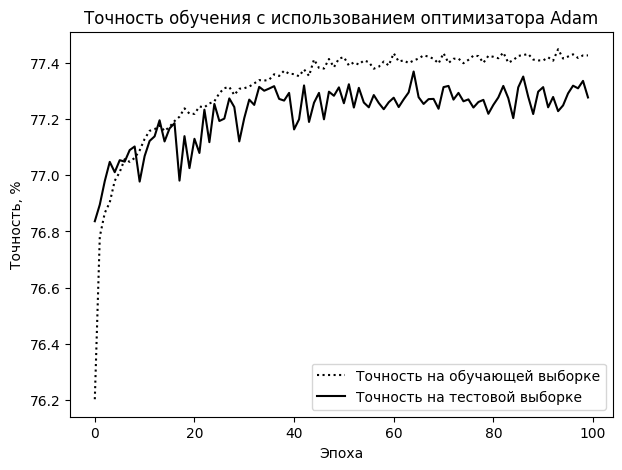

In [ ]:
plt.figure(figsize= (7,5))
plt.plot(train_acc, color = 'k', linestyle = ':', label = 'Точность на обучающей выборке')
plt.plot(val_acc, color = 'k', linestyle = '-', label = 'Точность на тестовой выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность, %')
plt.title('Точность обучения с использованием оптимизатора Adam')
plt.legend()

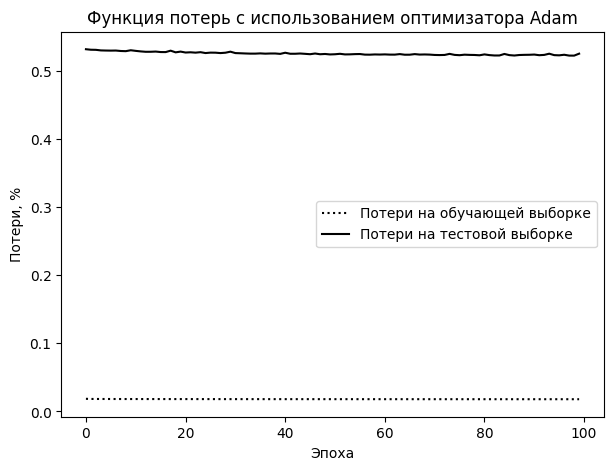

In [ ]:
plt.figure(figsize= (7,5))
plt.plot(train_loss, color = 'k', linestyle = ':', label = 'Потери на обучающей выборке')
plt.plot(val_loss, color = 'k', linestyle = '-', label = 'Потери на тестовой выборке')
plt.xlabel('Эпоха')
plt.ylabel('Потери, %')
plt.title('Функция потерь с использованием оптимизатора Adam')
plt.legend()

In [ ]:
val_acc

array([76.8357428 , 76.89473279, 76.97851568, 77.04690987, 77.01014799,
       77.05289436, 77.04776479, 77.08880131, 77.10162522, 76.97680582,
       77.06742812, 77.12128855, 77.13753217, 77.1948123 , 77.11957869,
       77.16574477, 77.18455317, 76.98022553, 77.13838709, 77.02468175,
       77.12898289, 77.07854218, 77.23242911, 77.11701391, 77.25294736,
       77.19224752, 77.20079679, 77.27261069, 77.24183331, 77.11957869,
       77.20250665, 77.26833605, 77.24952765, 77.31364721, 77.29996837,
       77.30766271, 77.31621199, 77.27090084, 77.26491635, 77.29227402,
       77.16232506, 77.19823201, 77.31877677, 77.18882781, 77.257222  ,
       77.29227402, 77.19823201, 77.29654866, 77.28201489, 77.31193735,
       77.25551214, 77.32305141, 77.24012345, 77.3102275 , 77.25807693,
       77.24097838, 77.28457967, 77.25636707, 77.23413896, 77.25893185,
       77.27517547, 77.24183331, 77.26919098, 77.29398388, 77.36836256,
       77.27688533, 77.25294736, 77.27004591, 77.27090084, 77.23